In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [27]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [28]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [29]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [30]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [32]:
# Find the most recent date in the data set.
mostrecentdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Most recent date: {mostrecentdate[0]}")

Most recent date: 2017-08-23


([], <a list of 0 Text major ticklabel objects>)

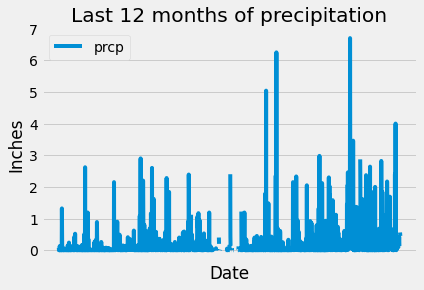

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
oneyearfrommostrecent = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement).filter(Measurement.date>oneyearfrommostrecent)

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.read_sql(precipitation.statement, con=engine)
precipitation_df.set_index('date', inplace=True)
#precipitation_df.head()

# Sort the dataframe by date
precipitation_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df_plot = precipitation_df.drop(['station', 'id','tobs' ], axis =1)
precipitation_df_plot.plot(grid=True, title='Last 12 months of precipitation')
plt.ylabel("Inches")
plt.xlabel("Date")
plt.xticks([])

In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df_plot.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number stations in the dataset
numberofstations = session.query(Station.id).count()
print(f'There are {numberofstations} weather stations in the dataset.')

There are 9 weather stations in the dataset.


In [40]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station,func.count(Measurement.id)]
mostactivestations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
mostactivestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [44]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest = session.query(func.min(Measurement.tobs)).filter_by(station="USC00519281")
print(f' The lowest tempurature for Station USC00519281 is {lowest.first()[0]}°F.')

highest = session.query(func.max(Measurement.tobs)).filter_by(station="USC00519281")
print(f' The highest tempurature for Station USC00519281 is {highest.first()[0]}°F.')

average = session.query(func.avg(Measurement.tobs)).filter_by(station="USC00519281")
print(f' The average tempurature for Station USC00519281 is {round(average.first()[0],1)}°F.')

 The lowest tempurature for Station USC00519281 is 54.0°F.
 The highest tempurature for Station USC00519281 is 85.0°F.
 The average tempurature for Station USC00519281 is 71.7°F.


Text(0.5, 0, 'Temperature')

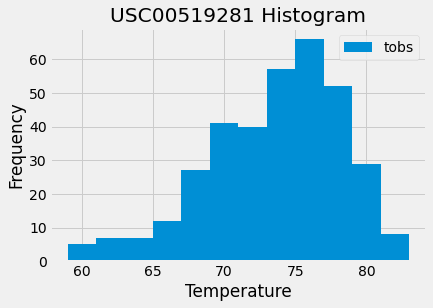

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram = session.query(Measurement).filter_by(station="USC00519281").filter(Measurement.date>oneyearfrommostrecent)
histogram_df = pd.read_sql(histogram.statement, con=engine)
histogram_df = histogram_df.drop(['id', 'prcp'], axis =1)
histogram_df.plot(kind="hist", bins=12, title = 'USC00519281 Histogram')
plt.xlabel("Temperature")

# Close session

In [54]:
# Close Session
session.close()